<h2 style="text-align: center;"><b>Домашнее задание 3. Математика для DS.
</b></h2>

В этом домашнем задании мы вспомним немного математики и закрепим PCA.


## Задание 1

1 балл

Посчитайте производную $f(x)=x^x$ в точке $x_0 = e$\
Тут надо действовать хитро. По определению взять не получится.\
Ответ округлите до десятых.

**Ответ:**

Положим $x=e^{ln\ x}$, тогда:\
$f^\prime(x)=(x^x)^\prime=({e^{x\cdot ln\ x}})^\prime=e^{x\cdot ln\ x}\cdot(x\cdot ln\ x)^\prime= e^{x\cdot ln\ x}\cdot(ln\ x + 1) = x^x\cdot(ln\ x + 1)$

После чего значение производной заданной функции в точке $x_0=e$ составит:

In [ ]:
import math

In [ ]:
def f1_deriv(x):
    return x**x * (math.log(x) + 1)

In [ ]:
round(f1_deriv(math.e), 1)

30.3

Или с помощью модуля scipy:

In [ ]:
from scipy.misc import derivative

def f1(x):
    return x**x

round(derivative(f1, math.e, n=1, dx=1e-6), 1)

30.3

## Задание 2

2 балла

Вычислите производную $f(x)=tg(x)⋅ln(cos(x^2)+1)$, в точке $x_0 = 0$

**Ответ:**

$$f^\prime(x)=(tg(x)⋅ln(cos(x^2)+1))^\prime=(tg(x))^\prime\cdot\ln(cos(x^2)+1)+tg(x)\cdot(ln(cos(x^2)+1))^\prime=$$
\
$$=\frac{ln(cos(x^2)+1)}{cos^2\ (x)}+tg(x)\cdot\frac{(cos(x^2)+1)^\prime}{cos(x^2)+1}=\frac{ln(cos(x^2)+1)}{cos^2\ x}+tg(x)\cdot\frac{-sin(x^2)\cdot2\cdot x}{cos(x^2)+1}$$

Тогда:\
$f^\prime(x_0)=ln(1+1)+0=ln\ 2 \approx 0.7$

Или с помощью задания функции:

In [ ]:
def f2_deriv(x):
    return math.log(math.cos(x**2)+1) / (math.cos(x))**2 + math.tan(x) * (-2*x*math.sin(x**2)) / (math.cos(x**2)+1)

round(f2_deriv(0), 1)

0.7

Или с помощью модуля scipy:

In [ ]:
def f2(x):
    return math.tan(x) * math.log(math.cos(x**2) + 1)

round(derivative(f2, 0., n=1, dx=1e-6), 1)

0.7

## Задание 3 ##

3 балла

Предположим, у вас есть функция, и вы бы хотели знать ее производную, но у вас нет аналитического выражения для нее.
Ваше задание --- написать функцию, которая будет вычислять производную ... кхм функции. Тавтология --- это не очень приятно, но я думаю, что Вы поняли что нужно делать.
Однако не подумайте, что вас просят написать что-то, что будет вычислять эту самую производную аналитически.
Попробуйте это сделать приближенно, опираясь на определение производной.

__Напоминание:__
Если вдруг вы не помните определение производной, то вот оно:

$$\lim_{h→0}\frac{f(x+h)−f(x)}{h}$$
Или, что то же:
$$\lim_{x→x_0}\frac{f(x)−f(x_0)}{x-x_0}$$

Если такой предел существует, то и производная существует (и равна этому пределу).

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def numerical_derivative_1d(func, epsilon):
    """
    Функция для приближённого вычисления производной функции одной переменной. 
    :param func: float -> float — произвольная дифференцируемая функция
    :param epsilon: float — максимальная величина приращения по оси Ох
    :return: другая функция, которая приближённо вычисляет производную в точке
    """
    def deriv_func(x):
        """
        :param x: float — точка, в которой нужно вычислить производную
        :return: приближённое значение производной в этой точке
        """        
        return (func(x + epsilon) - func(x)) / epsilon
        
    return deriv_func

In [ ]:
# Проверьте себя!
def polynom_to_prime(x):
    return 20 * x**5 + x**3 - 5 * x**2 + 2 * x + 2.0


def primed_poly(x):
    return 100 * x**4 + 3 * x**2 -10 * x + 2.0


approx_deriv = numerical_derivative_1d(polynom_to_prime, 1e-5)

grid = np.linspace(-2, 2, 100)
right_flag = True
tol = 0.05
debug_print = []

for x in grid:
    estimation_error = abs(primed_poly(x) - approx_deriv(x)) 
    if estimation_error > tol:
        debug_print.append((estimation_error, primed_poly(x), approx_deriv(x)))
        right_flag = False

if not right_flag:
    print("Что-то не то...")
    print(debug_print)
    plt.plot(grid, primed_poly(grid), label="Истинная производная")
    plt.plot(grid, approx_deriv(grid), label="Численное приближение")
    plt.legend()

print(str(right_flag))

True


# Задание 4 - сжатие звука

Σ 12 баллов за все подпункты

Помните как на лекции мы сжимали картинки с помощью PCA? Теперь вам предлагается сделать тоже самое, но со звуком!

In [ ]:
# понадобится для чтения и записи аудио файлов
from scipy.io import wavfile

# это нужно для проигрывания аудио файлов прямо в колабе
from IPython.display import Audio

Считаем wav файл и посмотрим его содержимое

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# ссылка для скачивания файла с гугл диска https://drive.google.com/file/d/1WmORZGngnOn2tMzyAEQOu1gps0ZxsgpB/view?usp=sharing

# Вставьте свой путь к файлу в строчке ниже
samplerate, data = wavfile.read('/content/gdrive/MyDrive/Colab Notebooks/Занятие 6/Beethoven_Violin_Sonata_Op_96_first_movement_bars_1-22.wav')


Выведем частоту дискретизации - она тут стандартная для аудио: 44100 герца

Она говорит о том, сколько последовательных элементов массива с сигналом кодируют звук длительностью 1 секунда.

Подробнее о кодировании звука читайте тут: https://ru.wikipedia.org/wiki/Кодирование_звуковой_информации

In [ ]:
samplerate

44100

Соответсвенно, если поделить длину массива сигнала на samplerate, получится длительность аудиодорожки в секундах

In [ ]:
# 45 секунд - похоже на правду)
len(data)/samplerate

45.139591836734695

Заметим, что звук - стерео, так как сигнал кодируется двумя каналами (для левого и правого динамика):

In [ ]:
data.shape

(1990656, 2)

Выведем сигналы в обоих каналах

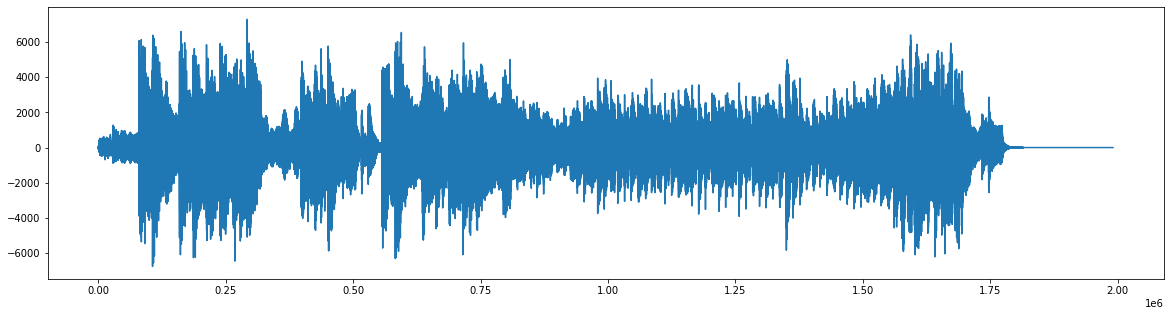

In [ ]:
# Канал 1
plt.figure(figsize=(20,5))
plt.plot(data[:,0])
plt.show()


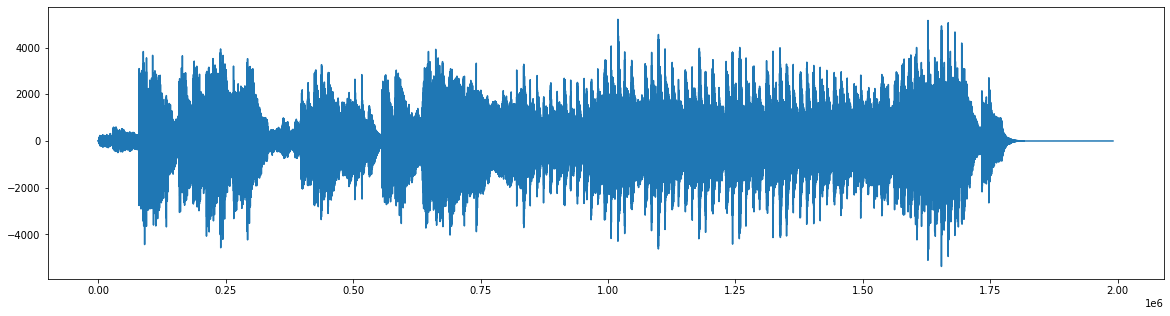

In [ ]:
# Канал 2
plt.figure(figsize=(20,5))
plt.plot(data[:,1])
plt.show()

Усредним каналы, и получим моно звук, с которым будет проще работать

In [ ]:
mono_sound = np.mean(data, axis=1)
print(mono_sound.shape)

(1990656,)


Давайте послушаем наконец, что же мы будем сжимать

In [ ]:
Audio(mono_sound, rate = samplerate)

Output hidden; open in https://colab.research.google.com to view.

Для удобства - обрежем массив с сигналом так, чтобы его было удобнее делить на равные части, датасет из которых и необходимо будет сжать известными вам методами. На самом деле способ очень похож на тот, которым мы сжимали картинку, деля её на прямоугольные подкартинки)

In [ ]:
mono_sound_to_cut = mono_sound[:1990000]

## Задание 4.1

3 балла

1) Разделите сигнал на равные части - размер частей выбирайте на ваше усмотрение. Рекомендуется 500 или 1000

2) Соберите из них "датасет", который будет представим в виде двуменого массива - "матрицы"

3) Сразу напишите функцию, которая будет переводить вашу "матрицу" обратно в звуковой сигнал. Проверьте что все работает, путем воспроизведения востановленного сигнала.

Разделим сигнал на части по 1000 элементов в каждой и сформируем массив:

In [ ]:
mono_sampled_array = np.array(np.split(mono_sound_to_cut, 1000))

Размерность получившегося массива:

In [ ]:
mono_sampled_array.shape

(1000, 1990)

Функция для преобразования массива в звуковой сигнал:

In [ ]:
def back_to_music(np_array):
    return Audio(np.hstack(np_array), rate = samplerate)

In [ ]:
back_to_music(mono_sampled_array)

Output hidden; open in https://colab.research.google.com to view.

## Задание 4.2

3 балла

1) Выполните PCA преобразование, и получите данные, сжатые в пространство меньшей размерности  

2) Постройте сами главные компоненты в наглядной форме. Сделайте выводы исходя из их вида.

3) Постройте scatter plot датасета в просрансве первых двух компонент, а третью используйте как цвет


Выполним PCA-перобразование:

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
n_components=250
pca = PCA(n_components=n_components, svd_solver='full')
transformed = pca.fit_transform(mono_sampled_array)

Рассмотрим доли объясненной дисперсии последних десяти компонент:

In [ ]:
explained_variance = np.cumsum(pca.explained_variance_ratio_)
explained_variance[-10:]

array([0.99763365, 0.9976668 , 0.99769933, 0.99773178, 0.99776342,
       0.99779443, 0.99782532, 0.99785598, 0.99788514, 0.99791391])

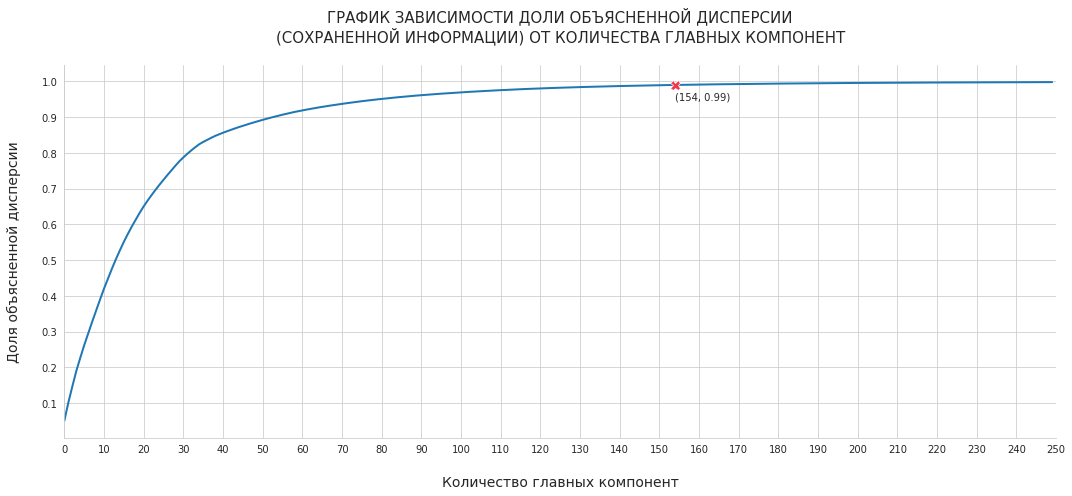

In [ ]:
import seaborn as sns
import pandas as pd
from matplotlib.ticker import MultipleLocator

df_to_plot = pd.DataFrame(data={'pca': np.arange(n_components), 'exp_var': explained_variance})
df_to_plot['mask'] = np.where(df_to_plot['pca'] == np.where(df_to_plot['exp_var'] >= 0.99)[0][0], 1, 0)
# df_to_plot['mask'] = np.where(df_to_plot['pca'] == 65, 1, 0)

sns.set_style(style='whitegrid')
sns.set_context(rc = {'lines.linewidth': 2.0, 'lines.markersize': 10})

fig, ax = plt.subplots(figsize=(15,7))

sns.lineplot(data=df_to_plot, x='pca', y='exp_var')
sns.lineplot(
    data=df_to_plot[df_to_plot['mask'] == 1], 
    x='pca', y='exp_var', 
    marker='X', 
    palette=sns.diverging_palette(10, 10, s=90, l=55, n=1), 
    style='mask', hue='mask', 
    legend=False)
plt.title(str.upper('График зависимости доли объясненной дисперсии\n(сохраненной информации) от количества главных компонент\n'), fontsize=15)
ax.set(xlim=(0, n_components))
plt.xlabel('\nКоличество главных компонент', fontsize=14)
plt.ylabel('Доля объясненной дисперсии\n',fontsize=14)
ax.xaxis.set_major_locator(MultipleLocator(10))
ax.yaxis.set_major_locator(MultipleLocator(0.1))
x_to_annotate = df_to_plot[df_to_plot['mask'] == 1]['pca'].iloc[0]
y_to_annotate = round(df_to_plot[df_to_plot['mask'] == 1]['exp_var'].iloc[0], 3)
plt.annotate(
    str((x_to_annotate,y_to_annotate)), (x_to_annotate,y_to_annotate), 
    xytext=(x_to_annotate, y_to_annotate - 0.04))
sns.set_style(style='whitegrid')
sns.despine()
plt.tight_layout()

Видим, что при 250-ти главных компонент (ГК) доля объясненной дисперсии составляет почти 0,998.\
По графику видно, что доля объясненной дисперсии замедляет свое значительное изменение в области 50-ти ГК, а начинает приближатся к 1 в области 200-т ГК.\
Выберем количество ГК равным 154, как начало выхода графика к пределу, доля объясненной дисперсии при этом составит 0,99.

In [ ]:
n_components=154
pca = PCA(n_components=n_components, svd_solver='full')
transformed = pca.fit_transform(mono_sampled_array)

Отобразим некоторые ГК, а именно:
- 1-2, 
- 10-11, 
- 70-71, 
- 153-154

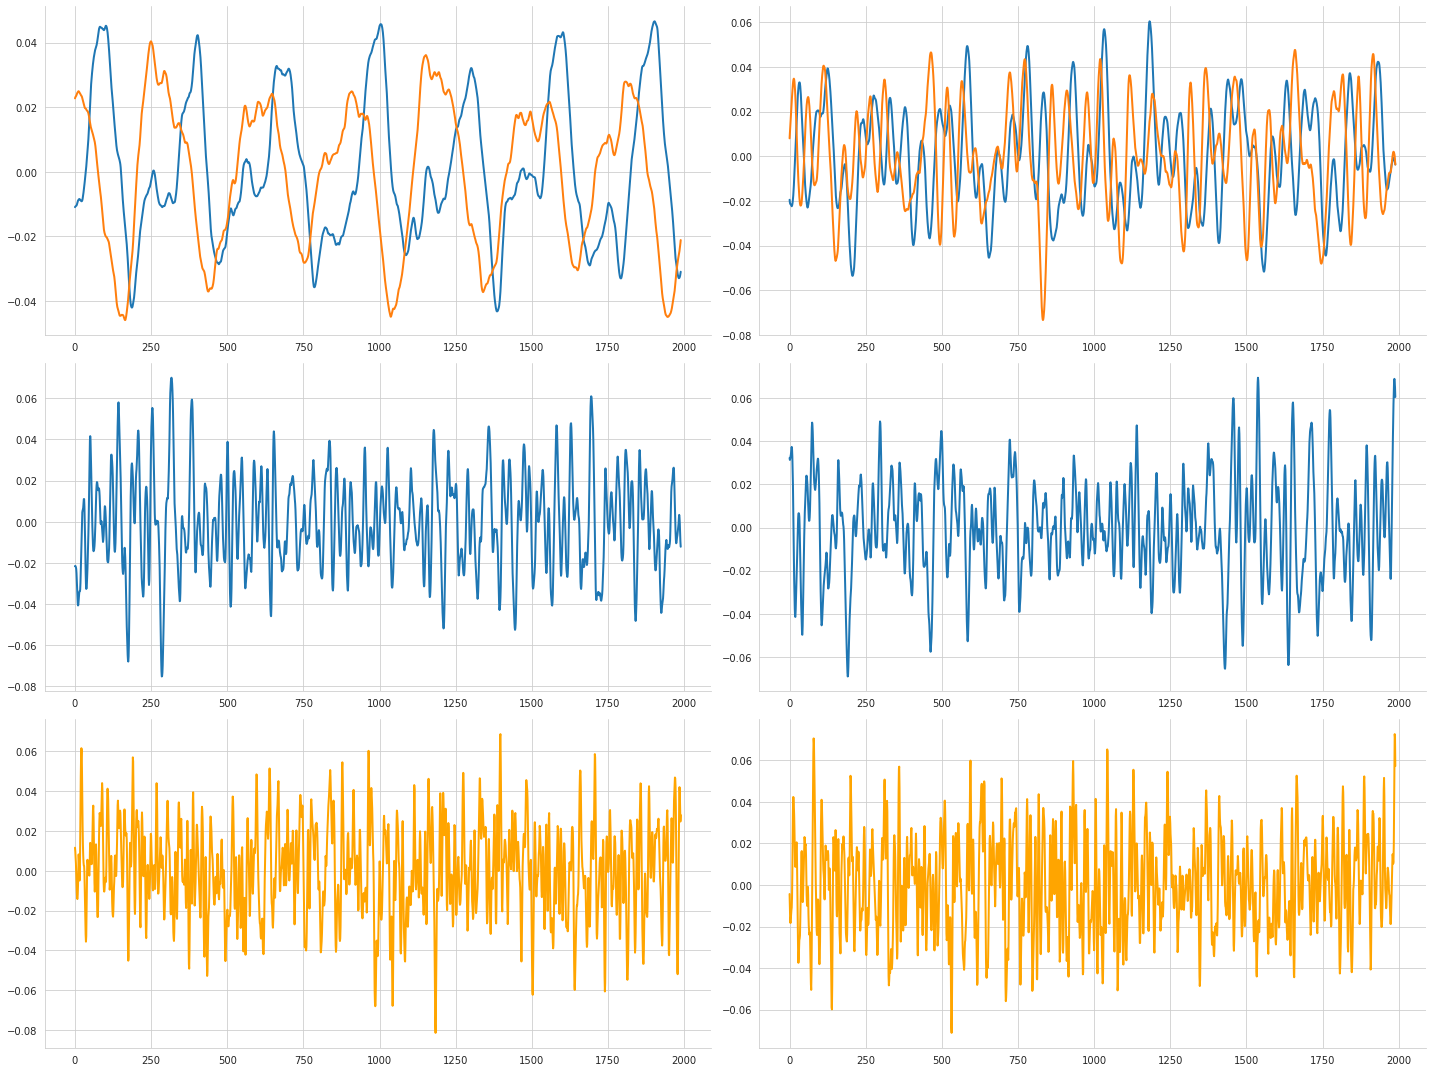

In [ ]:
fig, ax = plt.subplots(3,2, figsize=(20,15))
sns.lineplot(x=np.arange(len(pca.components_[0])), y=pca.components_[0], ax=ax[0,0])
sns.lineplot(x=np.arange(len(pca.components_[1])), y=pca.components_[1], ax=ax[0,0])
sns.lineplot(x=np.arange(len(pca.components_[10])), y=pca.components_[10], ax=ax[0,1])
sns.lineplot(x=np.arange(len(pca.components_[11])), y=pca.components_[11], ax=ax[0,1])
sns.lineplot(x=np.arange(len(pca.components_[69])), y=pca.components_[69], ax=ax[1,0])
sns.lineplot(x=np.arange(len(pca.components_[70])), y=pca.components_[70], ax=ax[1,1])
sns.lineplot(x=np.arange(len(pca.components_[152])), y=pca.components_[152], ax=ax[2,0], color='orange')
sns.lineplot(x=np.arange(len(pca.components_[153])), y=pca.components_[153], ax=ax[2,1], color='orange')
sns.despine()
plt.tight_layout()

Графики показывают, что видна очевидная зависимость номера ГК от частоты "сигнала" в ней, что наталкивает на предположение, что ГК сформированы относительно частот звуков, извелкаемых инструментами и накладывающимися друг на друга.

Построим scatter plot датасета в просрансве первых двух компонент, а третью используем как цвет:

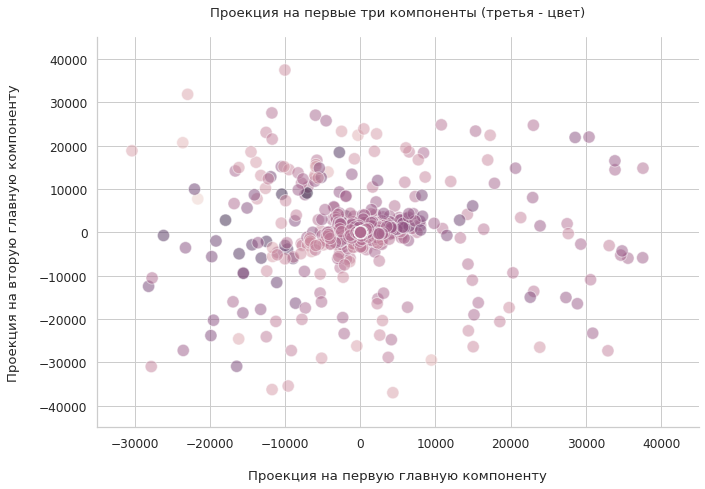

In [ ]:
pca_3 = PCA(n_components=3)
Y = pca_3.fit_transform(mono_sampled_array)

plt.figure(figsize=(10, 7))
sns.set_style(style='whitegrid')
sns.set_context('notebook', font_scale=1.1)
scplt = sns.scatterplot(x=Y[:, 0], y=Y[:, 1], hue=Y[:, 2], legend=False, alpha=0.5, s=150)
scplt.set(xlim=(-35000, 45000), ylim=(-45000, 45000))
plt.xlabel('\nПроекция на первую главную компоненту')
plt.ylabel('Проекция на вторую главную компоненту\n')
plt.title('Проекция на первые три компоненты (третья - цвет)\n')
sns.despine()
plt.tight_layout()

## Задание 4.3

2 балла

1) Выполните обратное PCA преобразование сжатыз данных и получите "матрицу" с сжатым звуком

2) Преобразуйте "матрицу" в сигнал (одномерный массив), и послушайте результат

Выполним обратное преобразование:

In [ ]:
pca.components_.shape

(154, 1990)

In [ ]:
recovered = pca.inverse_transform(transformed)

In [ ]:
recovered.shape

(1000, 1990)

Преобразуем в звуковой сигнал:

In [ ]:
back_to_music(recovered)

Output hidden; open in https://colab.research.google.com to view.

Слышны шумы во всем диапазоне звуковых частот и дребезг на высоких частотах.
С помощью фильтра сгладим их:

In [ ]:
def back_to_music_filtered(np_array):
    from scipy.ndimage import gaussian_filter1d
    return Audio(gaussian_filter1d(np.hstack(np_array), 2), rate = samplerate)

In [ ]:
back_to_music_filtered(recovered)

Output hidden; open in https://colab.research.google.com to view.

Частично дребезг пропал, шумы в целом нет, звук стал "замыленным". При увеличении силы воздействия фильтра качество записи сильно падает.

Подсказка! попробуйте отфильтровать сигнал с помощью функции gaussian_filter1d из scipy.ndimage. Это поможет убрать неприятный дробовой шум при сильном сжатии

Пример кода для фильтрации - Audio(gaussian_filter1d(mono_sound_compressed, 2), rate = samplerate)

## Задание 4.4

4 балла

1) Оберните получившийся код по сжатию звука в одну или несколько функций

2) Проведите исследование того, как степень сжатия (соотношения размера частей, на которые делился сигнал в п. 4.1 к размеру пространсва, в которое вы сжимали данные с помощью PCA) влияет на звук, по субъективным ощущениям. Начиная с какой степени сжания сильно слышится потеря качества? (как с учетом фильтрации с помощью gaussian_filter1d, так и без неё)

In [ ]:
def compression_ratio_audiotest(audio_data, n_elements, ratio):
    '''
    Функция выполняет сжатие звукового файла по заданному разбиению
    на части и коэффициенту звукового сжатия

    Параметры:
    audio_data: numpy array - двумерный массив стерео звукового сигнала,
    n_elements: integer - количество элементов в каждой части разделяемого массива,
    ratio: integer - коэффициент звукового сжатия
    return: audio object - сжатый звуковой файл
    '''
    
    # Преобразование стерео сигнала в моно
    mono_sound = np.mean(audio_data, axis=1)
    mono_sound_to_cut = mono_sound[:1990000]

    # Определяем количество требуемых главных компонент
    n_components = n_elements // ratio

    # Разделяем звуковой массив на части по n_elements в каждом
    mono_sampled_array = np.array(np.split(mono_sound_to_cut, n_elements))
    
    # Выполняем PCA-преобразование
    pca = PCA(n_components=n_components, svd_solver='full')
    transformed = pca.fit_transform(mono_sampled_array)

    # Выполняем обратное преобразование
    recovered = pca.inverse_transform(transformed)
    print(f'\nКоэффициент сжатия: {ratio}')
    print(f'Количество главных компонент: {n_components}')
    print(f'Доля объясненной дисперсии: {round(np.cumsum(pca.explained_variance_ratio_)[-1], 5)}\n')
    
    # Возвращаем сжатый звуковой файл
    return back_to_music(recovered)

С помощью написанной функции рассмотрим на слух как влияет степень сжатия на качетсво звука.

При степени сжатия 1 качество ожидаемо отличное:

In [ ]:
compression_ratio_audiotest(data, 1000, 1)

Output hidden; open in https://colab.research.google.com to view.

При степени сжатия 2 качетсво корошее, изменения на слух практически не различимы:

In [ ]:
compression_ratio_audiotest(data, 1000, 2)

Output hidden; open in https://colab.research.google.com to view.

При степени сжатия 3 отчетливо слышны шумы, особенно при переходи с высоких нот на низкие:

In [ ]:
compression_ratio_audiotest(data, 1000, 3)

Output hidden; open in https://colab.research.google.com to view.

При степени сжатия 5 шумы уже отчетливо слышны на всей записи:

In [ ]:
compression_ratio_audiotest(data, 1000, 5)

Output hidden; open in https://colab.research.google.com to view.

При дальнейшем увеличении степени сжатия шумы сильно прогрессируют и при 9 уже не выдерживают никакого качества:

In [ ]:
compression_ratio_audiotest(data, 1000, 7)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
compression_ratio_audiotest(data, 1000, 9)

Output hidden; open in https://colab.research.google.com to view.

Также при выполнении задания было замечено, что на качетсво сильно влияет каличество элементов при разбиении файла на части, что связано с уменьшением исходного пространства для дальнейшего преобразования.\
Например, при количестве элементов 500 уже при двойной степени сжатия отлично различимы шумы:

In [ ]:
compression_ratio_audiotest(data, 500, 2)

Output hidden; open in https://colab.research.google.com to view.

А приколичестве элементов 100 уже при двойной степени сжатия появляются звуковые артефакты, звуки, которых не было на исходной записи:

In [ ]:
compression_ratio_audiotest(data, 100, 2)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
compression_ratio_audiotest(data, 50, 2)

Output hidden; open in https://colab.research.google.com to view.

Отобразим графически рассмотренные зависимости:

In [ ]:
def compression_ratios_comparison(audio_data, n_elements):
    '''
    Функция формирует датафрейм зависимостей доли объясненной дисперсии от
    коэффициентов сжатия в диапазоне от 1 до 20 включительно для заданного
    разбиения звукового файла на части

    Параметры:
    audio_data: numpy array - двумерный массив стерео звукового сигнала,
    n_elements: integer - количество элементов в каждой части разделяемого массива,
    return: Pandas DataFrame - датафрейм расчитанных зависимостей
    '''

    import pandas as pd

    ratios = np.arange(1, 21, 1)
    
    # Преобразование стерео сигнала в моно
    mono_sound = np.mean(audio_data, axis=1)
    mono_sound_to_cut = mono_sound[:1990000]

    output = []

    for ratio in ratios:

        # Определяем количество требуемых главных компонент
        n_components = n_elements // ratio

        # Разделяем звуковой массив на части по n_elements в каждом
        mono_sampled_array = np.array(np.split(mono_sound_to_cut, n_elements))
        
        # Выполняем PCA-преобразование
        pca = PCA(n_components=n_components, svd_solver='full')
        transformed = pca.fit_transform(mono_sampled_array)

        # Выполняем обратное преобразование
        recovered = pca.inverse_transform(transformed)

        output.append([n_elements, ratio, n_components, round(np.cumsum(pca.explained_variance_ratio_)[-1], 5)])

    return pd.DataFrame(output, columns=['n_elements', 'ratio', 'n_components', 'exp_var'])

In [ ]:
df_1000 = compression_ratios_comparison(data, 1000)

In [ ]:
df_500 = compression_ratios_comparison(data, 500)

In [ ]:
df_100 = compression_ratios_comparison(data, 100)

In [ ]:
df_50 = compression_ratios_comparison(data, 50)

In [ ]:
df_all = pd.concat([df_1000, df_500, df_100, df_50], ignore_index=True)

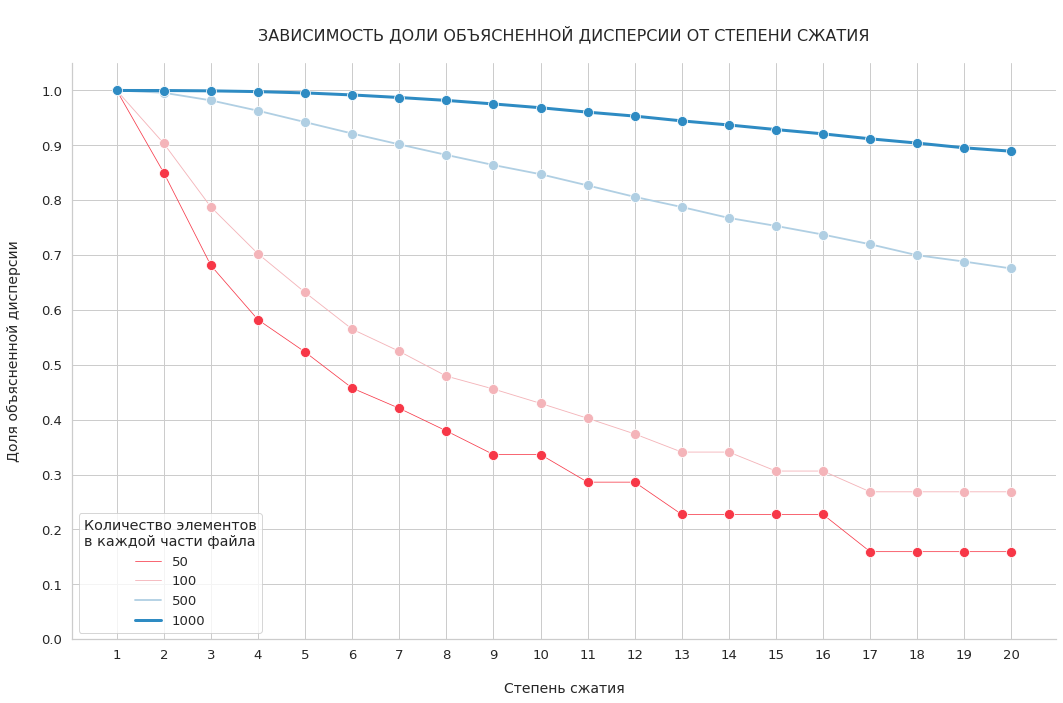

In [ ]:
user_palette_4c = sns.diverging_palette(10, 240, s=90, l=55, n=4)
plt.figure(figsize=(15,10))
sns.set_style('whitegrid')
sns.set_context('notebook', font_scale=1.2, rc = {'lines.linewidth': 1.5, 'lines.markersize': 10})
lnplt = sns.lineplot(data=df_all, x='ratio', y='exp_var', hue='n_elements', palette=user_palette_4c, marker='o', size='n_elements')
sns.set_context(rc = {'lines.linewidth': 2.0, 'lines.markersize': 10})
lnplt.set(ylim=(0, 1.05))
lnplt.set_title(str.upper('\nЗависимость доли объясненной дисперсии от степени сжатия\n'), fontsize=16)
lnplt.set_xlabel('\nСтепень сжатия', fontsize=14)
lnplt.set_ylabel('Доля объясненной дисперсии\n',fontsize=14)
lnplt.yaxis.set_major_locator(MultipleLocator(0.1))
lnplt.xaxis.set_major_locator(MultipleLocator(1))
lnplt.legend(title='Количество элементов\nв каждой части файла')
sns.despine()
plt.tight_layout()

Из графика видно насколько зависит качество звука от степени сжатия. Стоит отметить, что несмотря на то, что при 1000 элементах доля объясненной дисперсии падает достаточно плавно, на слух, как мы определили выше, изменения становятся критичными уже при 0,99.\
А при сокращении исходного пространства при разбиении файла для дальнейшего преобразования, качество падает гораздо сильнее.